In [59]:
import scanpy as sc
import scrublet as scr
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
file_path = "data/pbmc_10k.h5"
adata = sc.read_10x_h5(file_path)

/home/tomas/miniconda3/envs/scanpy1/lib/python3.10/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/tomas/miniconda3/envs/scanpy1/lib/python3.10/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [4]:
adata.var_names_make_unique()

In [5]:
# Convert sparse matrix to dense for Scrublet
scrub = scr.Scrublet(adata.X.toarray())

In [6]:
doublet_scores, predicted_doublets = scrub.scrub_doublets()

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.32
Detected doublet rate = 5.0%
Estimated detectable doublet fraction = 56.4%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 8.8%
Elapsed time: 10.6 seconds


In [7]:
adata.obs['doublet_scores'] = doublet_scores
adata.obs['predicted_doublets'] = predicted_doublets

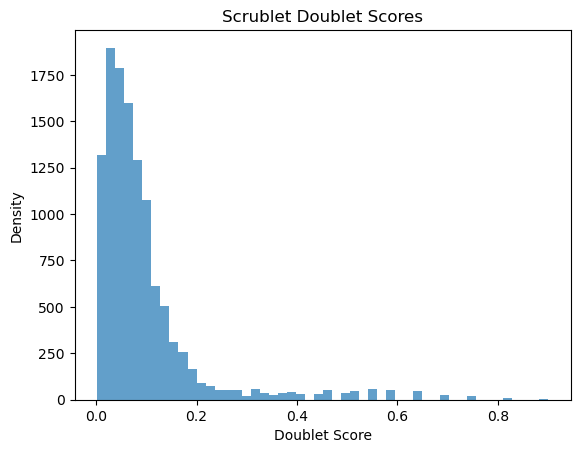

In [8]:
plt.hist(doublet_scores, bins = 50, alpha = 0.7)
plt.xlabel('Doublet Score')
plt.ylabel('Density')
plt.title('Scrublet Doublet Scores')
plt.show()

In [9]:
# mitochondrial genes, "MT-" for human, "Mt-" for mouse
adata.var["mt"] = adata.var_names.str.startswith("MT-")
# ribosomal genes
adata.var["ribo"] = adata.var_names.str.startswith(("RPS", "RPL"))
# hemoglobin genes
adata.var["hb"] = adata.var_names.str.contains("^HB[^(P)]")

In [10]:
sc.pp.calculate_qc_metrics(
    adata, qc_vars=["mt", "ribo", "hb"], inplace=True, log1p=True
)

In [11]:
# Total-count normalization (library-size correct)
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, n_top_genes=2000)
sc.tl.pca(adata)
sc.pp.neighbors(adata)
sc.tl.leiden(adata, flavor="igraph", resolution=0.9)
sc.tl.umap(adata)

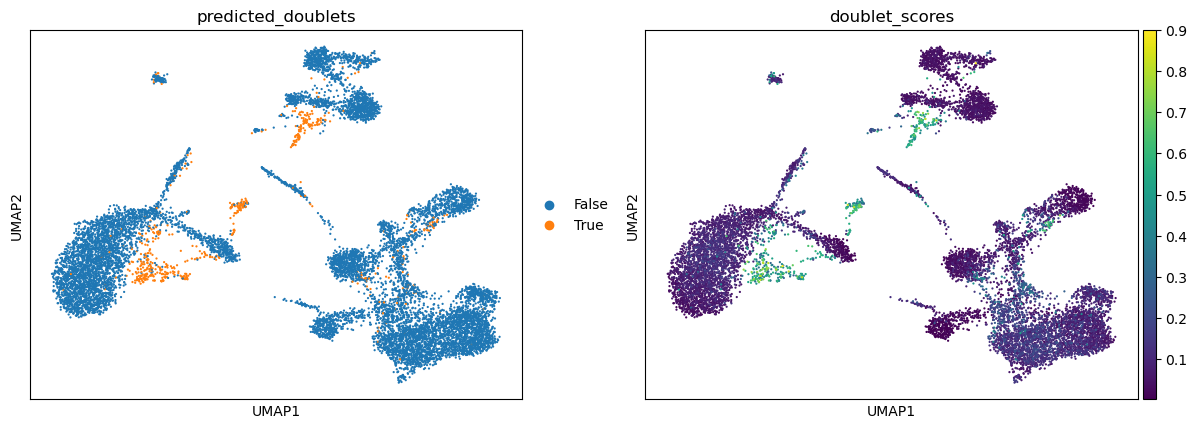

In [12]:
sc.pl.umap(
    adata,
    color=["predicted_doublets", "doublet_scores"]
)

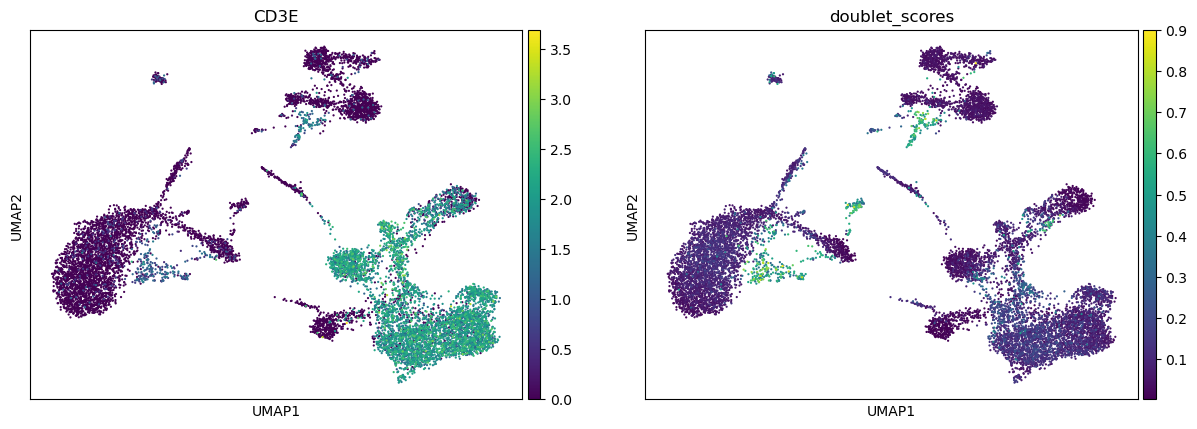

In [13]:
sc.pl.umap(
    adata,
    color=["CD3E", "doublet_scores"]
)

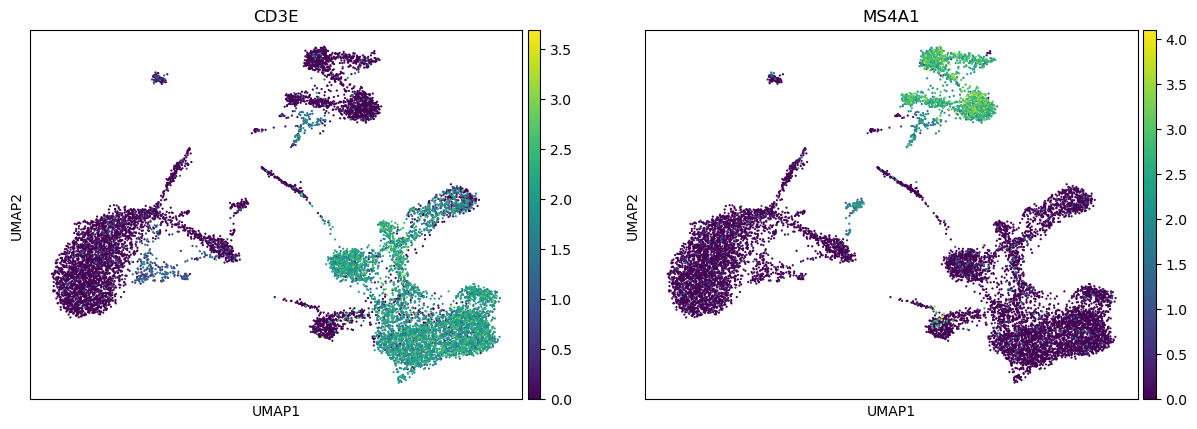

In [14]:
sc.pl.umap(
    adata,
    color=["CD3E", "MS4A1"]
)

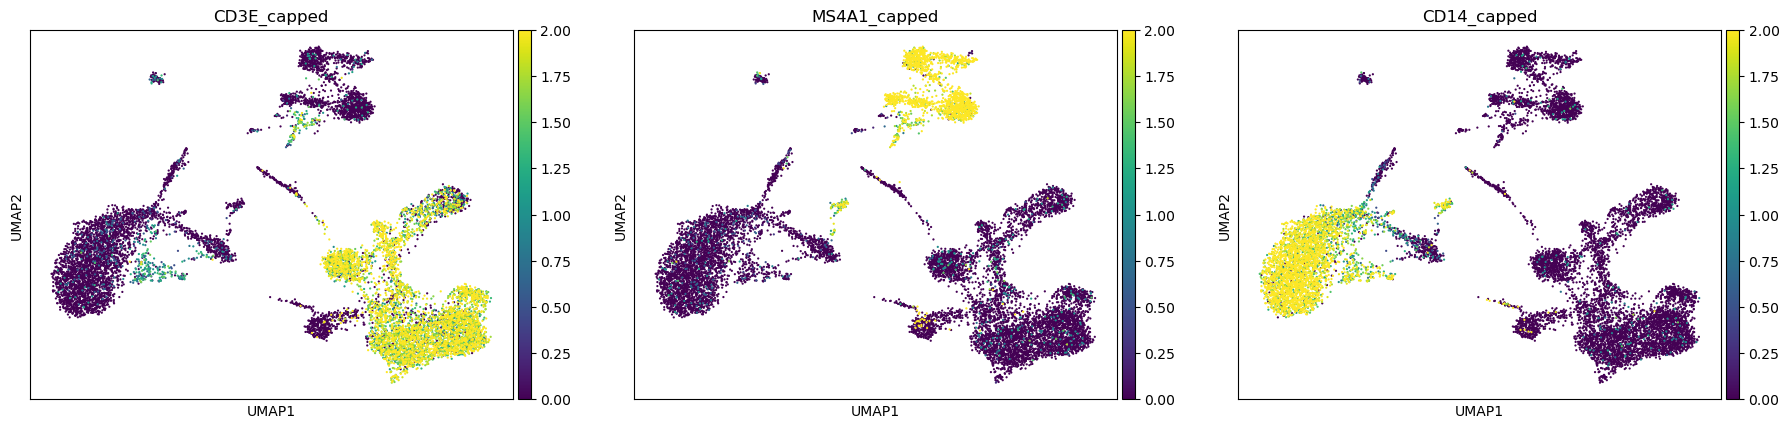

In [15]:
max_cutoff = 2
gene = 'CD3E'  # Replace with your gene of interest
adata.obs[f'{gene}_capped'] = np.minimum(adata[:, gene].X.toarray().flatten(), max_cutoff)
gene2 = 'MS4A1'  # Replace with your gene of interest
adata.obs[f'{gene2}_capped'] = np.minimum(adata[:, gene2].X.toarray().flatten(), max_cutoff)
gene3 = 'CD14'  # Replace with your gene of interest
adata.obs[f'{gene3}_capped'] = np.minimum(adata[:, gene3].X.toarray().flatten(), max_cutoff)

# Plot the UMAP with the capped expression values
sc.pl.umap(adata, color=[f'{gene}_capped', f'{gene2}_capped', f'{gene3}_capped'], cmap='viridis')

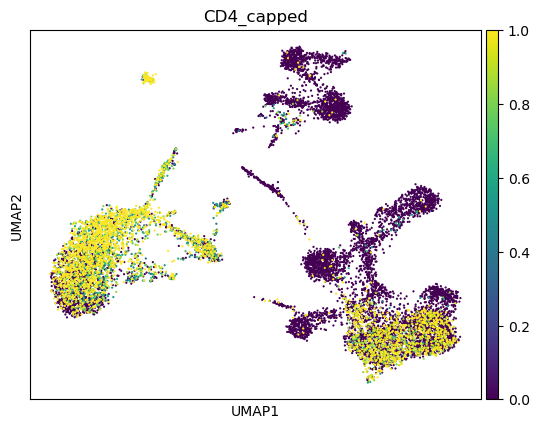

In [16]:
max_cutoff = 1
gene4 = 'CD4'  # Replace with your gene of interest
adata.obs[f'{gene4}_capped'] = np.minimum(adata[:, gene4].X.toarray().flatten(), max_cutoff)

# Plot the UMAP with the capped expression values
sc.pl.umap(adata, color=[f'{gene4}_capped'], cmap='viridis')

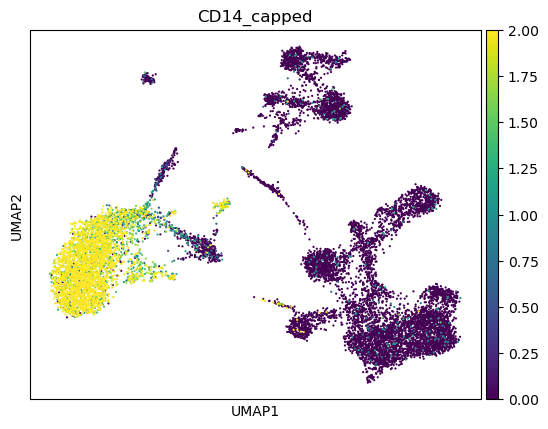

In [17]:
max_cutoff = 2
gene = 'CD14'  # Replace with your gene of interest
adata.obs[f'{gene}_capped'] = np.minimum(adata[:, gene].X.toarray().flatten(), max_cutoff)

# Plot the UMAP with the capped expression values
sc.pl.umap(adata, color=f'{gene}_capped', cmap='viridis')

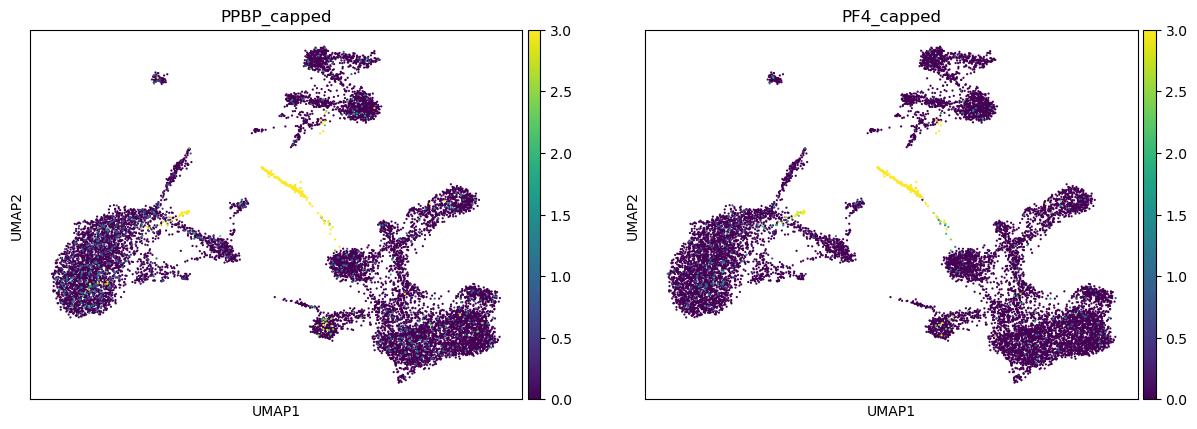

In [18]:
max_cutoff = 3
gene = 'PPBP'  # Replace with your gene of interest
adata.obs[f'{gene}_capped'] = np.minimum(adata[:, gene].X.toarray().flatten(), max_cutoff)
gene2 = 'PF4'  # Replace with your gene of interest
adata.obs[f'{gene2}_capped'] = np.minimum(adata[:, gene2].X.toarray().flatten(), max_cutoff)

# Plot the UMAP with the capped expression values
sc.pl.umap(adata, color=[f'{gene}_capped', f'{gene2}_capped'], cmap='viridis')

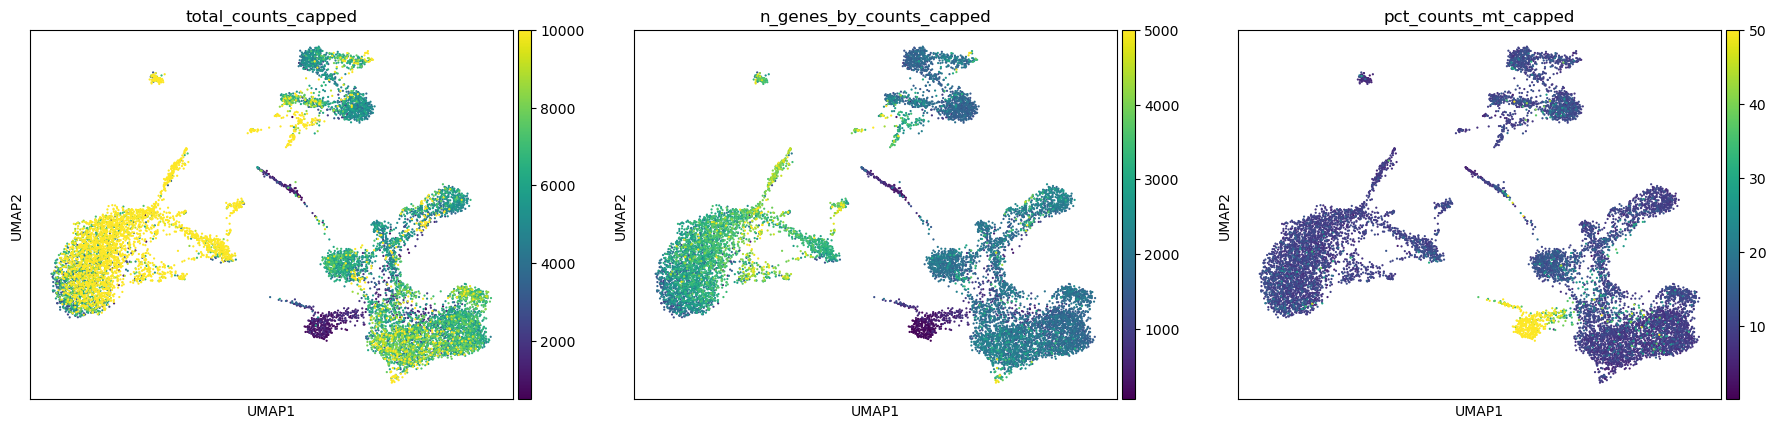

In [29]:
adata.obs['total_counts_capped'] = np.minimum(adata.obs['total_counts'].values.astype(float), 10000)
adata.obs['n_genes_by_counts_capped'] = np.minimum(adata.obs['n_genes_by_counts'].values.astype(float), 5000)
adata.obs['pct_counts_mt_capped'] = np.minimum(adata.obs['pct_counts_mt'].values.astype(float), 50)
sc.pl.umap(adata, color = ['total_counts_capped', 'n_genes_by_counts_capped', 'pct_counts_mt_capped'])

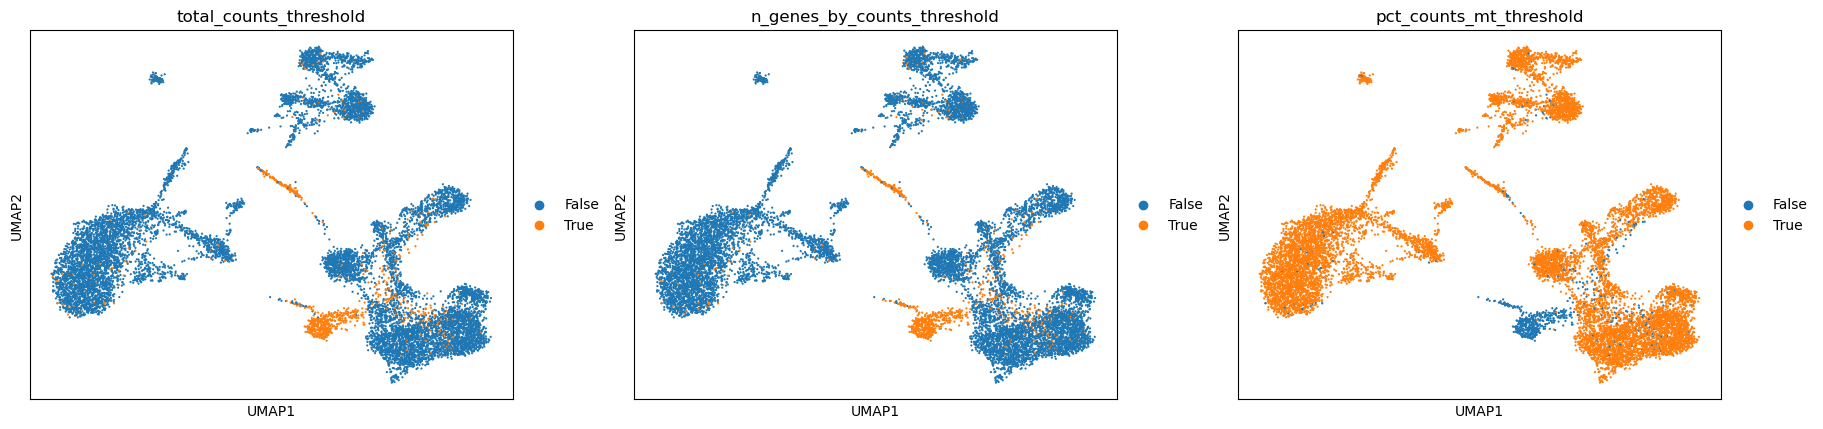

In [71]:
adata.obs["total_counts_threshold"] = adata.obs.total_counts < 2500
adata.obs['n_genes_by_counts_threshold'] = adata.obs.n_genes_by_counts < 1000
adata.obs['pct_counts_mt_threshold'] = adata.obs.pct_counts_mt < 20
sc.pl.umap(adata, color=['total_counts_threshold', 'n_genes_by_counts_threshold', 'pct_counts_mt_threshold'])

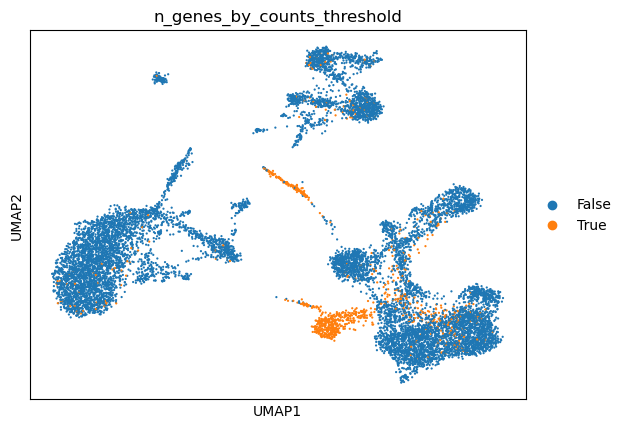

In [21]:
adata.obs['n_genes_by_counts_threshold'] = adata.obs.n_genes_by_counts < 1000
sc.pl.umap(adata, color='n_genes_by_counts_threshold')

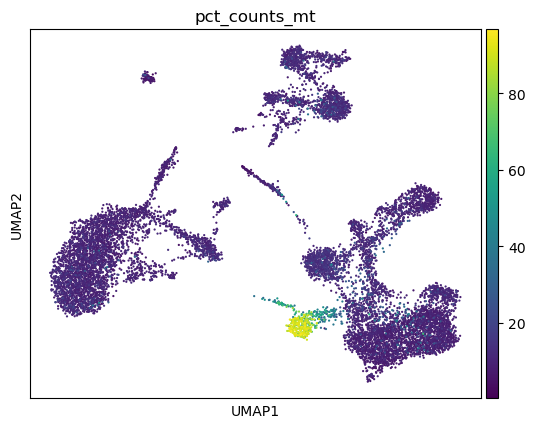

In [22]:
sc.pl.umap(adata, color='pct_counts_mt')

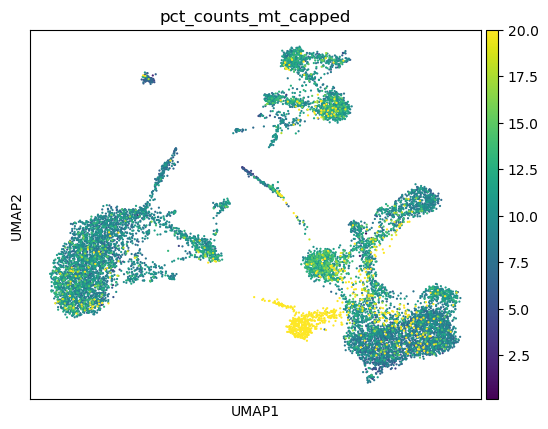

In [23]:
adata.obs['pct_counts_mt_capped'] = np.minimum(adata.obs['pct_counts_mt'].values.astype(float), 20)
sc.pl.umap(adata, color = 'pct_counts_mt_capped')

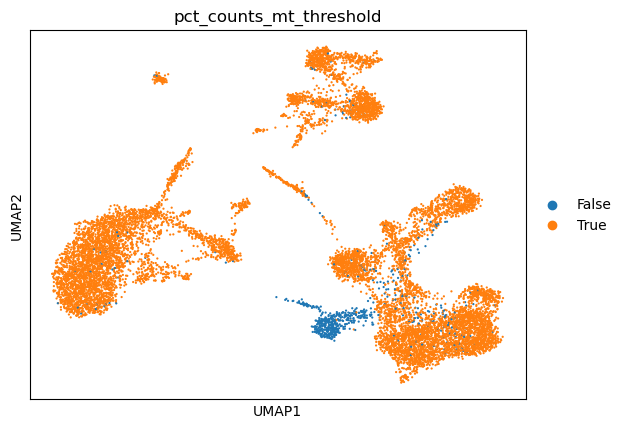

In [24]:
adata.obs['pct_counts_mt_threshold'] = adata.obs.pct_counts_mt < 20
sc.pl.umap(adata, color='pct_counts_mt_threshold')

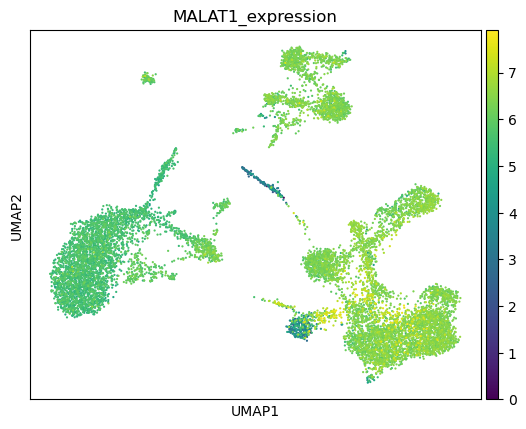

In [65]:
gene = 'MALAT1'  # Replace with your gene of interest
adata.obs[f'{gene}_expression'] = adata[:, gene].X.toarray().flatten()
sc.pl.umap(adata, color=f'{gene}_expression')

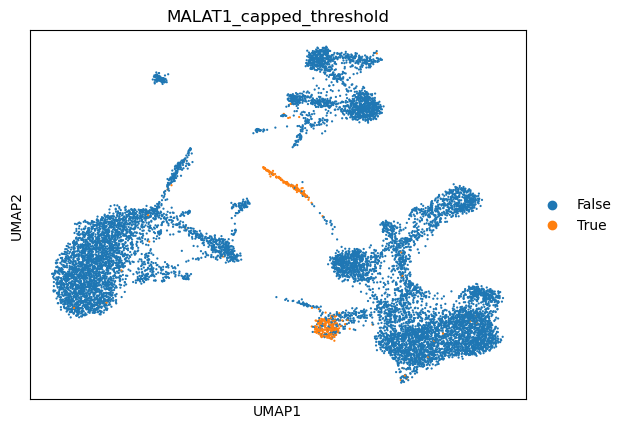

In [72]:
gene = 'MALAT1'  # Replace with your gene of interest
adata.obs[f'{gene}_expression'] = adata[:, gene].X.toarray().flatten()
adata.obs['MALAT1_threshold'] = adata.obs.MALAT1_capped < 4.3
sc.pl.umap(adata, color='MALAT1_capped_threshold')

/home/tomas/miniconda3/envs/scanpy1/lib/python3.10/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


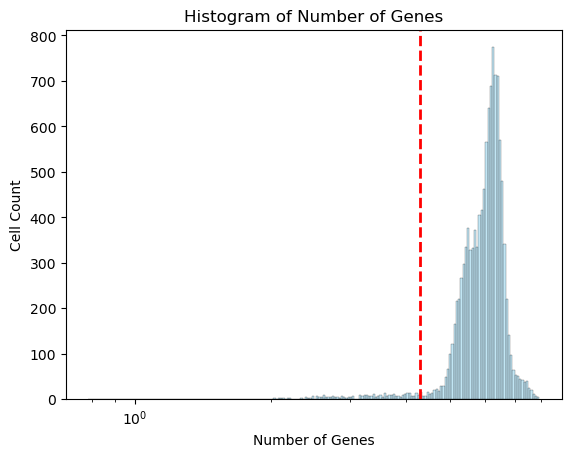

In [63]:
min_genes = 4.3
total_genes_data = adata.obs['MALAT1_capped']
sns.histplot(total_genes_data, bins=200, kde=True, color='skyblue', edgecolor='black', log_scale=True)
plt.axvline(x=min_genes, color='red', linestyle='--', linewidth=2, label='Threshold = 1000')
plt.xlabel('Number of Genes')
plt.ylabel('Cell Count')
plt.title('Histogram of Number of Genes')
plt.show()

In [25]:
adata.obs.columns

Index(['doublet_scores', 'predicted_doublets', 'n_genes_by_counts',
       'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts',
       'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes',
       'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes',
       'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt',
       'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo',
       'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'leiden',
       'CD3E_capped', 'MS4A1_capped', 'CD14_capped', 'CD4_capped',
       'PPBP_capped', 'PF4_capped', 'total_counts_capped',
       'total_counts_threshold', 'n_genes_by_counts_threshold',
       'pct_counts_mt_capped', 'pct_counts_mt_threshold'],
      dtype='object')